In [2]:
# importing section
import numpy as nump
import pandas as pand
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [3]:
# loading dataset
df = sea.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
# checking null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<AxesSubplot:>

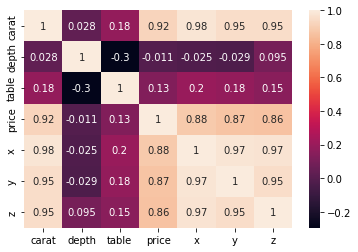

In [5]:
# generating heatmap
sea.heatmap(df.corr(),annot=True)

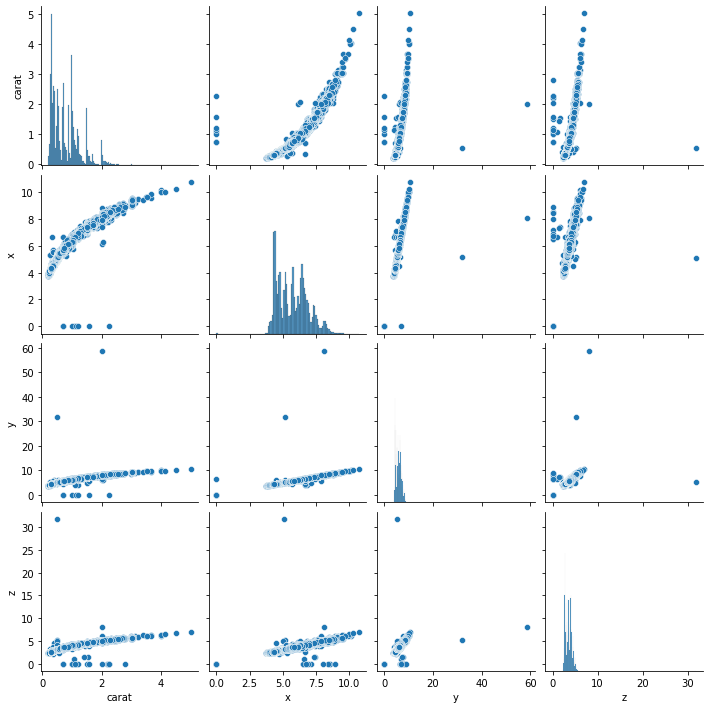

In [6]:
# scatterplot of selected features
sea.pairplot(df[['carat','x','y','z']])

In [7]:
# As we want to predict the carat so we are selecting only the 
# axis as our features
X=df[['x','y','z']]
X_features=['x','y','z']
Xarr=X.values.reshape((-1,1))
y=df['carat']

In [8]:
# Train/test 
xtrain,xtest,ytrain,ytest = train_test_split(X,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 3) (8091, 3) (45849,) (8091,)


In [9]:
# Stochastic Regression
sgdr = SGDRegressor(alpha = 0.001, verbose = 0)
sgdr.fit(xtrain, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
#cv_results = cross_validate(sgdr, X, y, cv=3)

SGDRegressor(alpha=0.001)
number of iterations completed: 7, number of weight updates: 320944.0


In [10]:
# approximate score
sgdr.score(xtest,ytest)

0.9574340240613187

In [11]:
b = sgdr.intercept_
w = sgdr.coef_
print(f"model parameters:\n w:{w},\n b:{b}")


model parameters:
 w:[0.35967237 0.00900716 0.06756365],
 b:[-1.56149323]


In [12]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(xtest)
# make a prediction using w,b. 
y_pred = nump.dot(xtest, w) + b  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on test set:\n{y_pred[:10].round(2)}" )
print(f"Target values \n{ytest[:10].values}")

prediction using np.dot() and sgdr.predict match: True
Prediction on test set:
[0.32 2.05 1.03 1.47 0.36 0.86 1.43 0.83 1.26 1.27]
Target values 
[0.36 2.57 0.98 1.5  0.38 0.78 1.51 0.75 1.23 1.23]


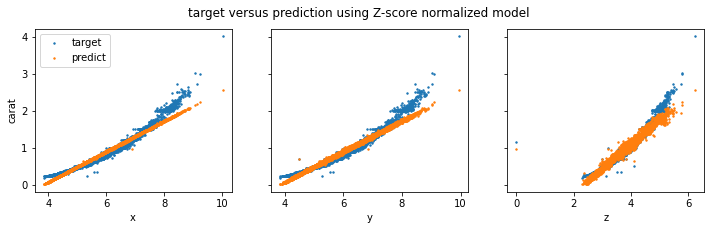

In [13]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i,col in enumerate(X_features):
    ax[i].scatter(xtest[col],ytest, label = 'target', s=2)
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(xtest[col],y_pred, label = 'predict', s=2)
ax[0].set_ylabel("carat"); ax[0].legend();
fig.suptitle("target versus prediction using Z-score normalized model")
plt.show()


In [14]:
# Assigning engineered feature
X=df['x'].values
x=nump.c_[X,X**2]

In [15]:
#train/test
xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size=.15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 2) (8091, 2) (45849,) (8091,)


In [16]:
# scaling section
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtrain)
xtrainsc=sc.transform(xtrain)
xtestsc=sc.transform(xtest)

In [17]:
#weight update
sgdr.fit(xtrainsc, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b = sgdr.intercept_
w = sgdr.coef_
print(f"model parameters:\n w: {w}, \n b:{b}")

SGDRegressor(alpha=0.001)
number of iterations completed: 7, number of weight updates: 320944.0
model parameters:
 w: [-0.17218093  0.63811204], 
 b:[0.79575254]


In [18]:
# scoring
sgdr.score(xtestsc,ytest)

0.9891935360815793

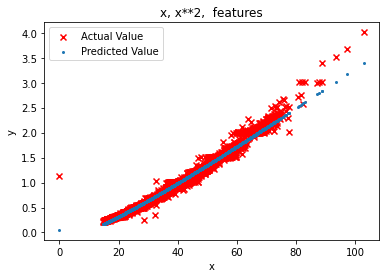

In [20]:
#plotting the prediction 
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

In [24]:
# Assigning an engineered feature polynomial X^3
X=df['x'].values
x=nump.c_[X,X**2,X**3]

In [25]:
#train/test
xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size=.15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 3) (8091, 3) (45849,) (8091,)


In [26]:
# scaling section
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtrain)
xtrainsc=sc.transform(xtrain)
xtestsc=sc.transform(xtest)

In [27]:
sgdr.fit(xtrainsc, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b = sgdr.intercept_
w = sgdr.coef_
print(f"model parameters:\n w: {w}, \n b:{b}")

SGDRegressor(alpha=0.001)
number of iterations completed: 7, number of weight updates: 320944.0
model parameters:
 w: [-0.07062141  0.17374765  0.3710813 ], 
 b:[0.79842866]


In [28]:
#scoring
sgdr.score(xtestsc,ytest)

0.9922233536727179

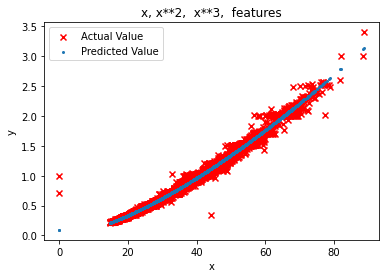

In [29]:
#plotting prediction
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,  x**3,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()